In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import graphviz

In [150]:
indicators = pd.read_csv('train.csv')

In [151]:
data = indicators.fillna(-999)

In [238]:
len(data)

550068

In [152]:
data.loc[data['City_Category']=='A','City_Category'] = 1
data.loc[data['City_Category']=='B','City_Category'] = 2
data.loc[data['City_Category']=='C','City_Category'] = 3

In [153]:
data.loc[data['Stay_In_Current_City_Years']=='4+','Stay_In_Current_City_Years'] = 4

In [154]:
data.loc[data['Gender']=='F','Gender'] = 1
data.loc[data['Gender']=='M','Gender'] = 0

In [155]:
ages = list(data['Age'].unique())
data.loc[data['Age']=='55+','Age'] = 55
ages.remove('55+')

In [157]:
for item in ages:
    age = item.split('-')
    data.loc[data['Age']==item,'Age']= (int(age[0])+int(age[1]))/2

In [158]:
le = LabelEncoder()
data['User_ID'] = le.fit_transform(data['User_ID'])
data['Product_ID'] = le.fit_transform(data['Product_ID'])

In [144]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [159]:
data = data.astype(int)

In [160]:
d = data[:10000]

In [218]:
y = d['Purchase']
X = d[['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']]

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Linear Regression

In [186]:
lm = LinearRegression()

In [187]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [188]:
print (lm.intercept_)

11204.297680640691


In [189]:
lm.coef_

array([-4.68531367e-01, -6.41188781e+02,  8.49865962e+00, -8.70979673e+00,
        4.60444181e+02,  9.30364211e+00, -6.80926645e+01, -4.20381993e+02])

In [190]:
y_train = pd.DataFrame(y_train,columns=['Purchase'])

In [191]:
y_train

,Purchase
6861,6874
9881,19600
4536,18966
8430,11523
6765,7192
2067,8142
4668,8589
9740,4267
7477,15577
3711,12428


In [192]:
pd.DataFrame(lm.coef_, X_train.columns, columns = ['Coeff'])

,Coeff
Product_ID,-0.468531
Gender,-641.188781
Age,8.498660
Occupation,-8.709797
City_Category,460.444181
Stay_In_Current_City_Years,9.303642
Marital_Status,-68.092664
Product_Category_1,-420.381993


In [193]:
predictions = lm.predict(X_test)

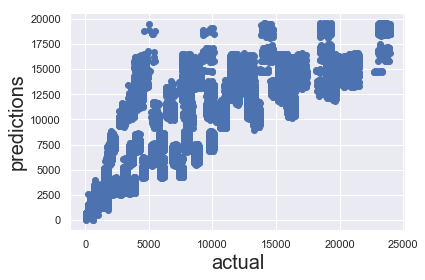

In [239]:
plt.scatter(y_test, predictions)
plt.xlabel('actual',fontsize=20)
plt.ylabel('predictions',fontsize=20)
plt.show()

# XGB BOOST Train Model on 10000 observation

In [220]:
params = {}
params["min_child_weight"] = 10
params["subsample"] = 0.7
params["colsample_bytree"] = 0.7
params["scale_pos_weight"] = 0.8
params["silent"] = 1
params["max_depth"] = 6
params["nthread"] = 6
#params["gamma"] = 1
params["objective"] = "reg:linear"
params["eta"] = 0.1
params["base_score"] = 1800
params["eval_metric"] = "rmse"
params["seed"] = 0

plst = list(params.items())
num_rounds = 3000

In [221]:
xgtrain = xgb.DMatrix(X_train,label =y_train )
watchlist = [(xgtrain, 'train')]
model_1_xgboost = xgb.train(plst, xgtrain, num_rounds)

In [222]:
model_1_predict = model_1_xgboost.predict(xgb.DMatrix(X_test))

In [223]:
mean_squared_error(y_test, model_1_predict)

9807297.676376944

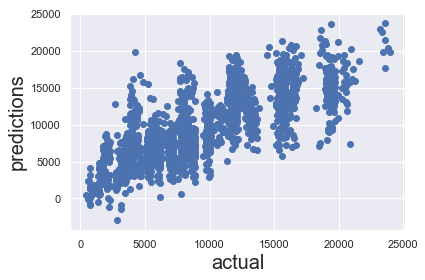

In [225]:
plt.scatter(y_test, model_1_predict)
plt.xlabel('actual',fontsize=20)
plt.ylabel('predictions',fontsize=20)
plt.show()

# XGB BOOST Regressor Model on 10000 observation

In [226]:
xgb_model = xgb.XGBRegressor().fit(X_train, y_train)
predictions = xgb_model.predict(X_test)
actuals = y_test

In [227]:
mean_squared_error(actuals, predictions)

8652442.34897651

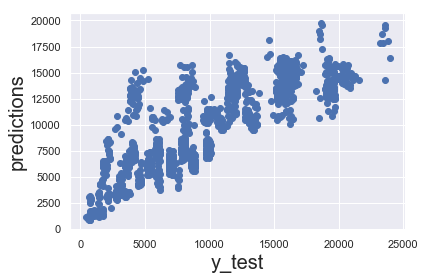

In [228]:
plt.scatter(actuals, predictions)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('predictions',fontsize=20)
plt.show()

# XGB BOOST Regressor Model on all the observation

In [229]:
y = data['Purchase']
X = data[['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']]

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [231]:
xgb_model = xgb.XGBRegressor().fit(X_train, y_train)
predictions = xgb_model.predict(X_test)
actuals = y_test

In [232]:
mean_squared_error(actuals, predictions)

8633104.764480997

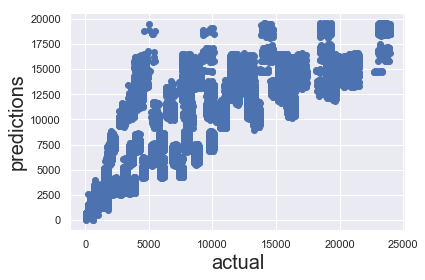

<Figure size 432x288 with 0 Axes>

In [237]:
plt.scatter(actuals, predictions)
plt.xlabel('actual',fontsize=20)
plt.ylabel('predictions',fontsize=20)
plt.show()
plt.savefig('XGBoosterRegressor')